In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
data=pd.read_csv("D:/Desktop/DATA SETS/Olympic.csv")
data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [40]:
data.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

In [41]:
data.dropna(inplace=True)
data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271078,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
271082,135554,Bogusaw Zych,M,28.0,182.0,82.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze


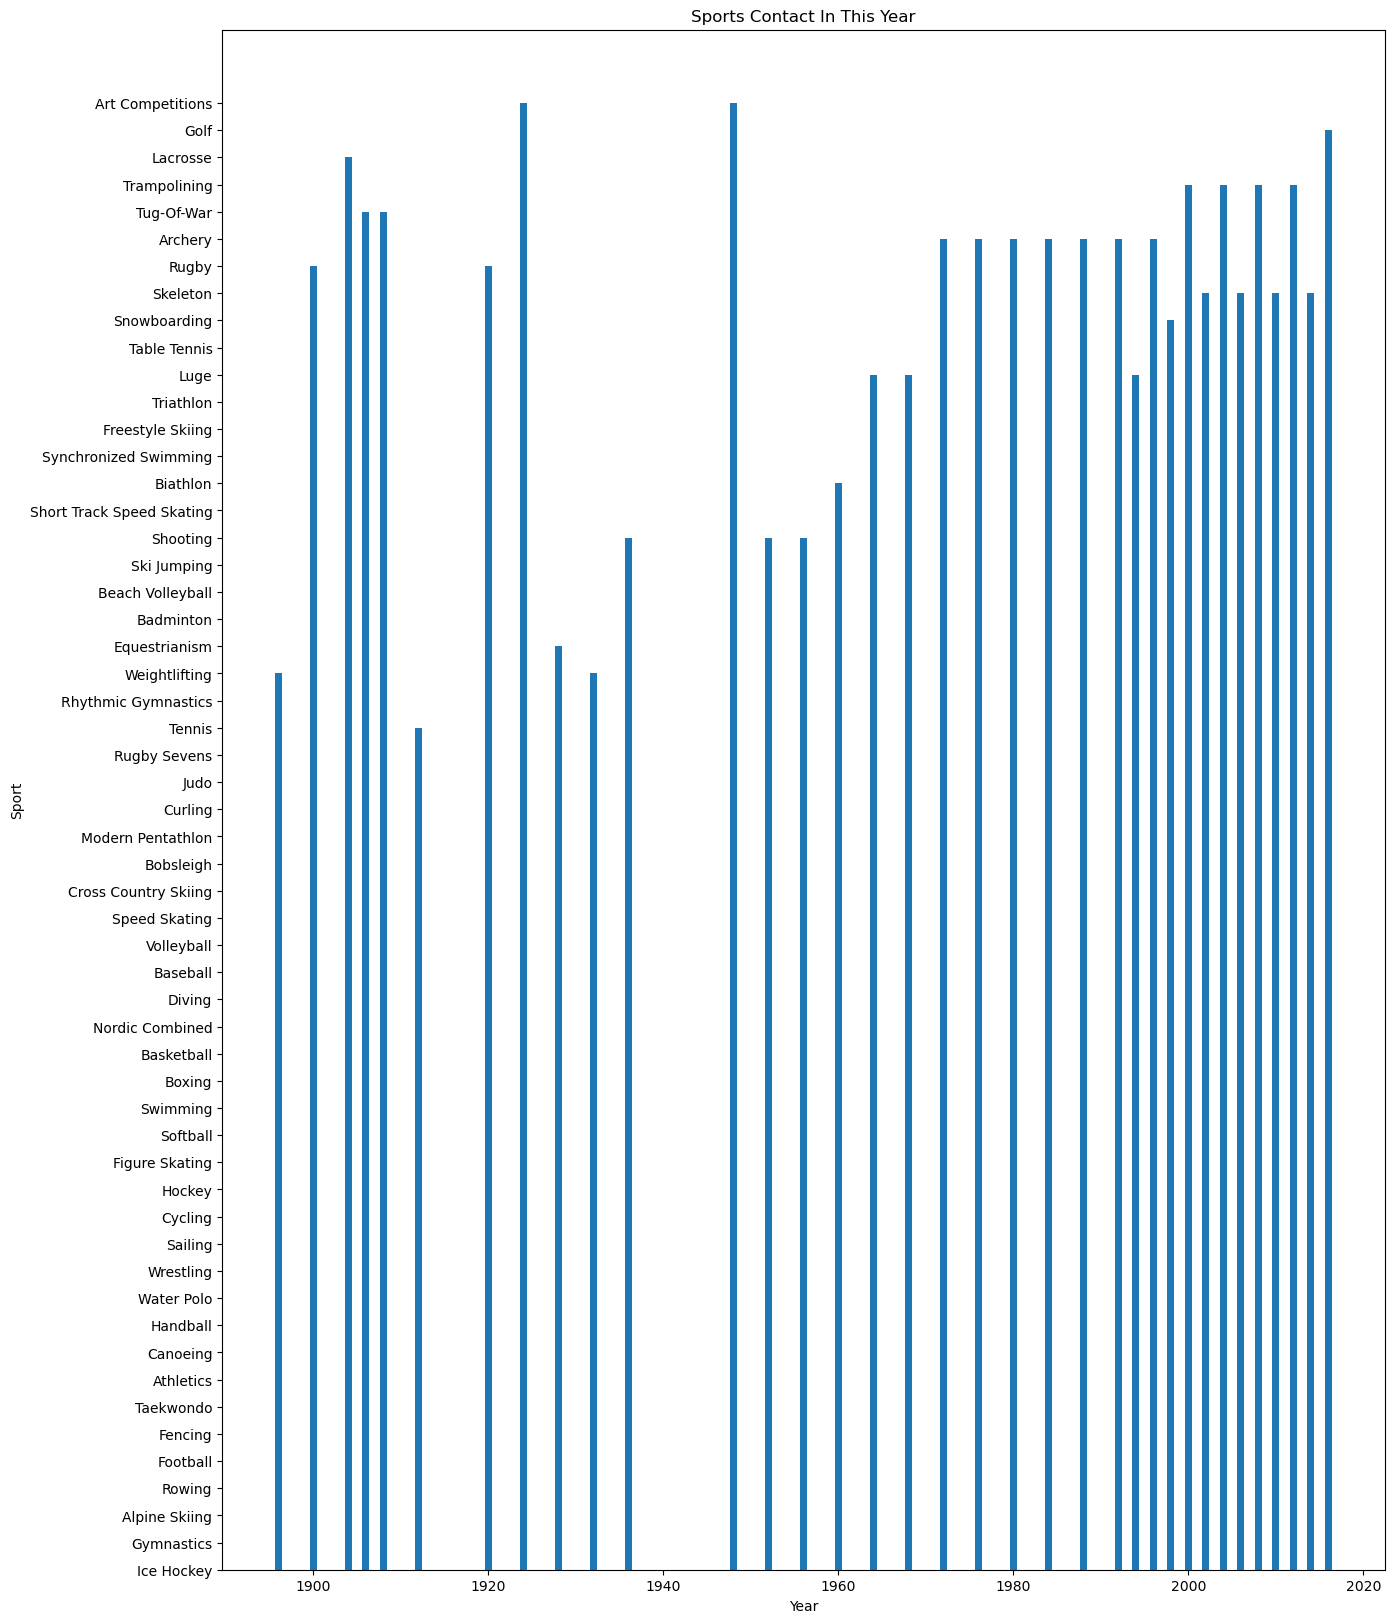

In [46]:
plt.figure(figsize=(15,20))
plt.bar(data["Year"],data["Sport"])
plt.xlabel("Year")
plt.ylabel("Sport")
plt.title("Sports Contact In This Year")
plt.show()

In [47]:
x=data.iloc[:,[2,3,6,9,10,11,12]].values
x

array([['M', 28.0, 'Finland', ..., 'Winter', 'Sochi', 'Ice Hockey'],
       ['M', 28.0, 'Finland', ..., 'Summer', 'London', 'Gymnastics'],
       ['M', 28.0, 'Finland', ..., 'Summer', 'London', 'Gymnastics'],
       ...,
       ['M', 28.0, 'Poland', ..., 'Summer', 'Moskva', 'Fencing'],
       ['F', 19.0, 'Russia', ..., 'Summer', 'Sydney', 'Athletics'],
       ['F', 23.0, 'Russia', ..., 'Summer', 'Athina', 'Athletics']],
      dtype=object)

In [48]:
y=data.iloc[:,-1].values
y

array(['Bronze', 'Bronze', 'Gold', ..., 'Bronze', 'Bronze', 'Silver'],
      dtype=object)

In [49]:
label=LabelEncoder()
x[:,0]=label.fit_transform(x[:,0])
x[:,1]=label.fit_transform(x[:,1])
x[:,2]=label.fit_transform(x[:,2])
x[:,3]=label.fit_transform(x[:,3])
x[:,4]=label.fit_transform(x[:,4])
x[:,5]=label.fit_transform(x[:,5])
x[:,6]=label.fit_transform(x[:,6])
x

array([[1, 15, 75, ..., 1, 34, 25],
       [1, 15, 75, ..., 0, 17, 22],
       [1, 15, 75, ..., 0, 17, 22],
       ...,
       [1, 15, 171, ..., 0, 22, 17],
       [0, 6, 184, ..., 0, 38, 3],
       [0, 10, 184, ..., 0, 3, 3]], dtype=object)

In [50]:
y=label.fit_transform(y).reshape(-1,1)
y

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [2]])

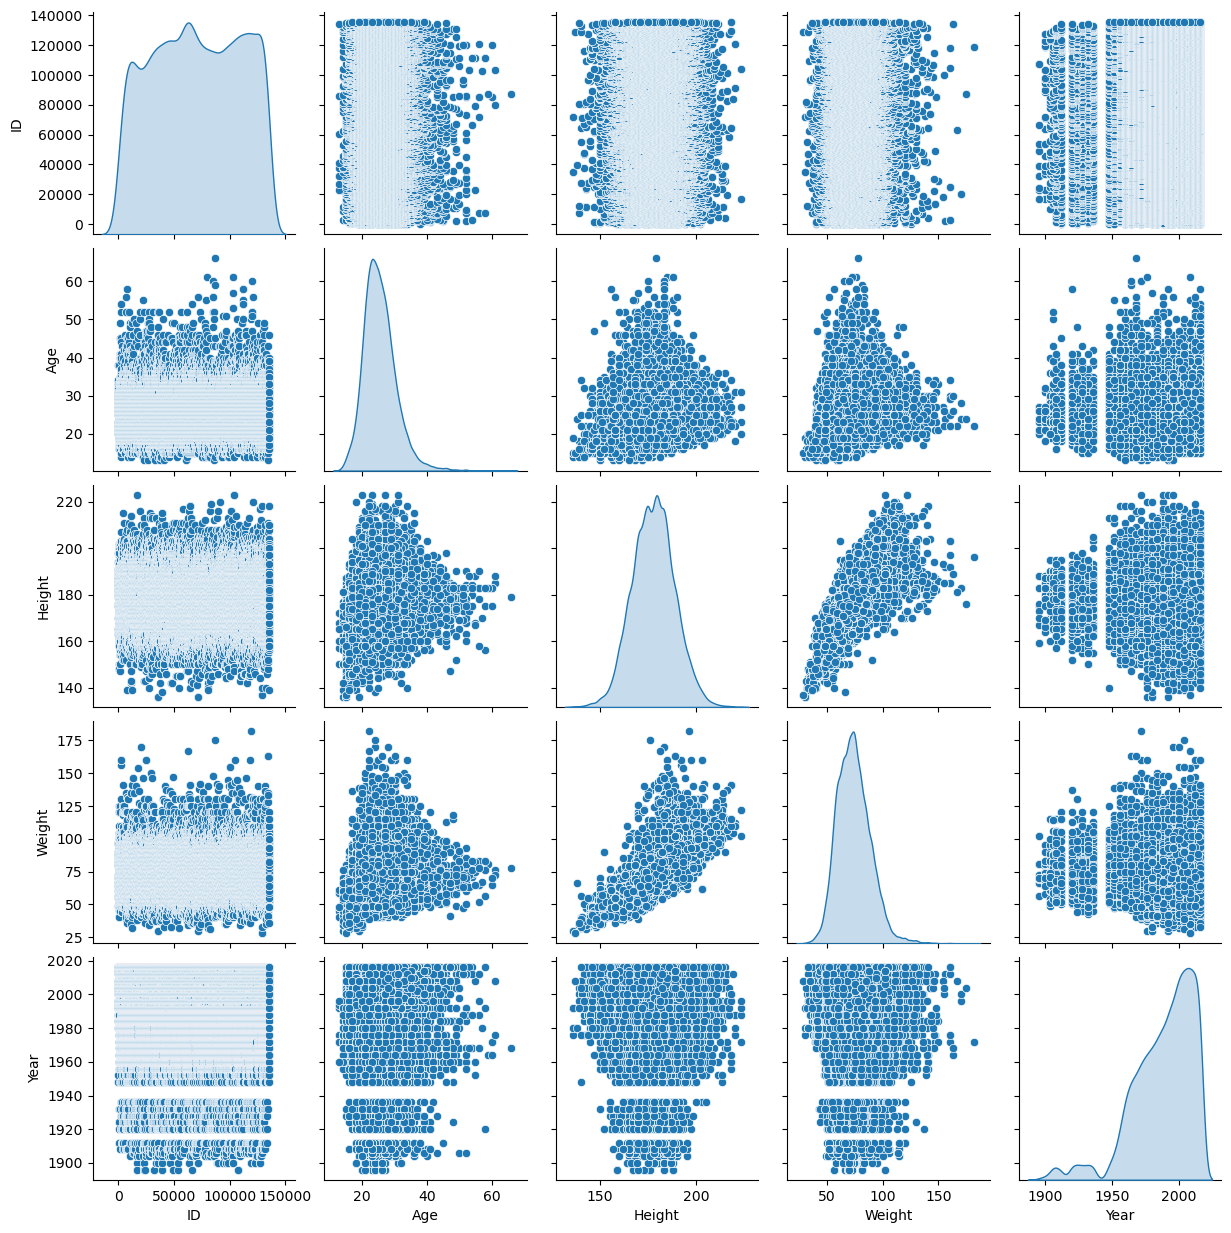

In [25]:
sns.pairplot(data,diag_kind="kde")
plt.show()

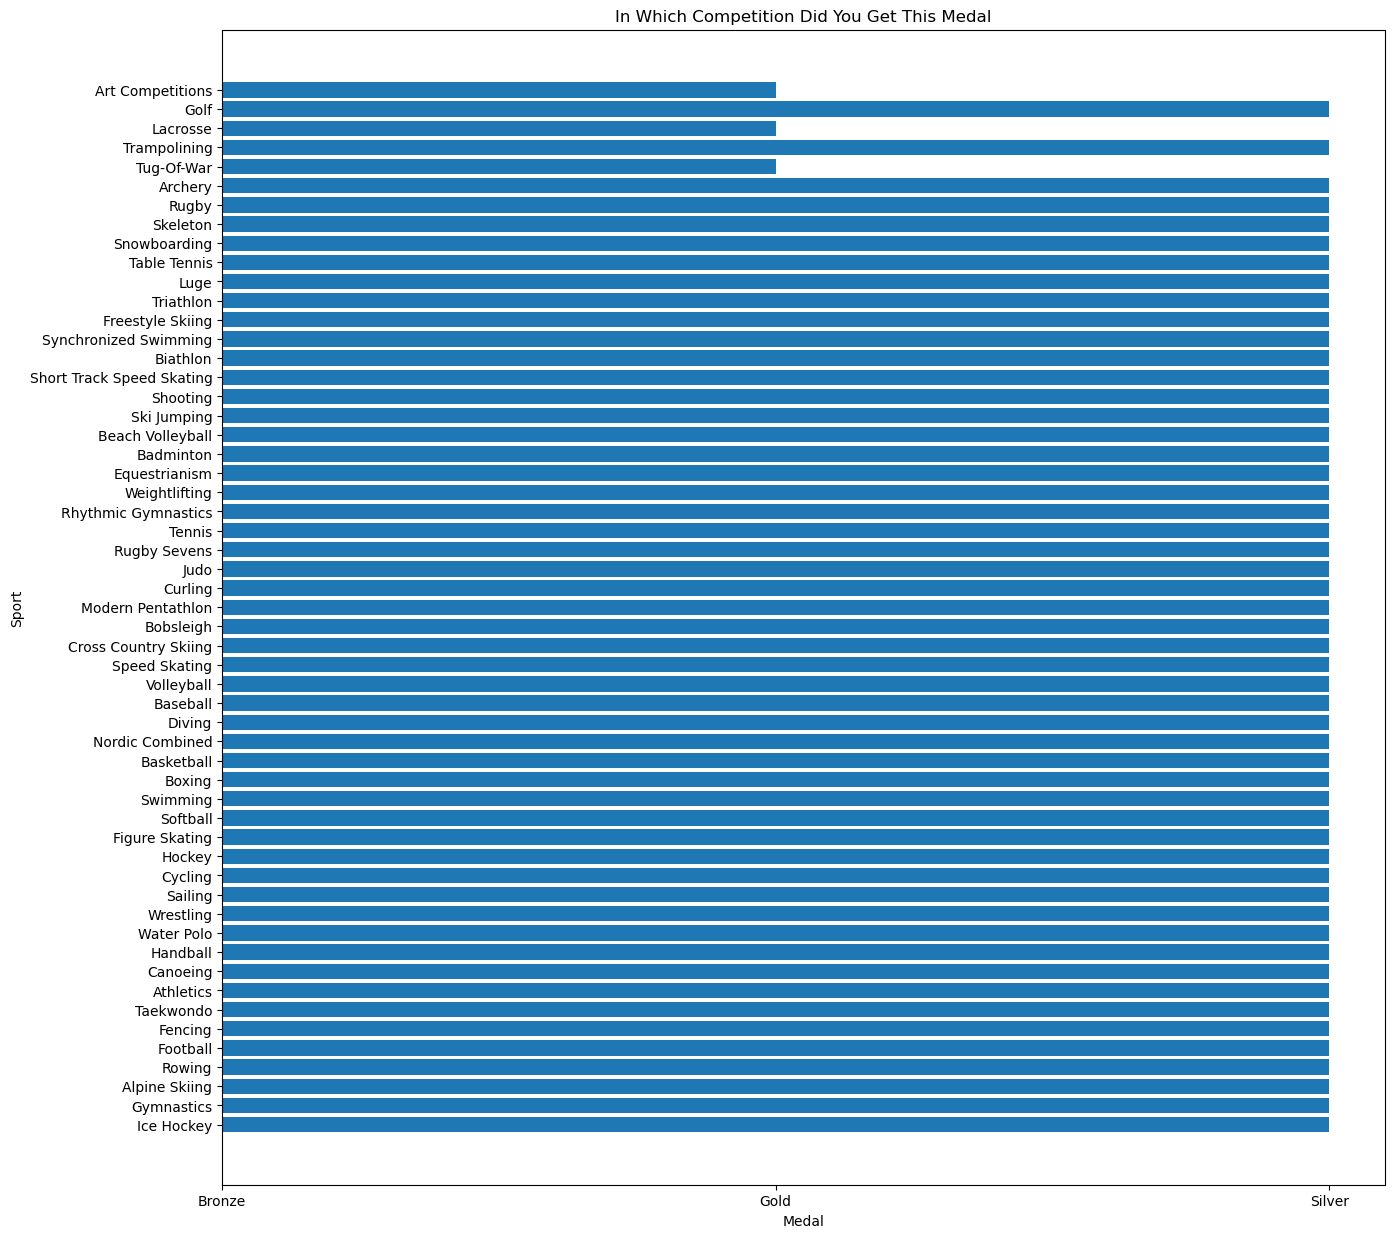

In [51]:
plt.figure(figsize=(15,15))
plt.barh(data["Sport"],data["Medal"])
plt.xlabel("Medal")
plt.ylabel("Sport")
plt.title("In Which Competition Did You Get This Medal")
plt.show()

In [10]:
from sklearn import model_selection
import warnings
warnings.filterwarnings("ignore")

In [11]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = GaussianNB()
clf4 = DecisionTreeClassifier()
clf5 = KNeighborsClassifier()
print('5-fold cross validation:\n')
labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes','DecisionTreeClassifier','KNeighborsClassifier']

5-fold cross validation:



In [48]:
for clf,label in zip([clf1, clf2, clf3,clf4,clf5], labels):
    scores=model_selection.cross_val_score(clf, x, y, cv=5,scoring='accuracy')
    print("Accuracy:%0.2f [%s]"% (scores.mean(), label))

Accuracy:0.37 [Logistic Regression]
Accuracy:0.63 [Random Forest]
Accuracy:0.37 [Naive Bayes]
Accuracy:0.62 [DecisionTreeClassifier]
Accuracy:0.57 [KNeighborsClassifier]


In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [13]:
from sklearn.preprocessing import StandardScaler
line=StandardScaler()
x_train=line.fit_transform(x_train)
x_test=line.fit_transform(x_test)

In [14]:
reg=RandomForestClassifier()
reg.fit(x_train,y_train)

RandomForestClassifier()

In [15]:
reg.predict([[1,6,184,19,0,22,17]])

array([0])

In [16]:
ran_y_tr_pre=reg.predict(x_train)
ran_y_te_pre=reg.predict(x_test)
score_all=reg.score(x_test,y_test)
print(score_all)

0.6250993904055129


In [17]:
ran_tr_acc=accuracy_score(y_train,ran_y_tr_pre)
print(ran_tr_acc)
ran_te_acc=accuracy_score(y_test,ran_y_te_pre)
print(ran_te_acc)

0.9164126352993153
0.6250993904055129


In [19]:
print(classification_report(y_test,ran_y_te_pre))

              precision    recall  f1-score   support

           0       0.63      0.64      0.64      2497
           1       0.64      0.64      0.64      2605
           2       0.60      0.58      0.59      2444

    accuracy                           0.63      7546
   macro avg       0.62      0.62      0.62      7546
weighted avg       0.62      0.63      0.62      7546



In [21]:
pd.DataFrame(classification_report(y_test,ran_y_te_pre,output_dict=True))

,0,1,2,accuracy,macro avg,weighted avg
precision,0.634464,0.641574,0.597158,0.625099,0.624399,0.624836
recall,0.644373,0.644530,0.584697,0.625099,0.624533,0.625099
f1-score,0.639380,0.643049,0.590862,0.625099,0.624430,0.624933
support,2497.000000,2605.000000,2444.000000,0.625099,7546.000000,7546.000000


In [22]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,ran_y_te_pre)
print(cm)

[[1609  421  467]
 [ 429 1679  497]
 [ 498  517 1429]]


<Axes: >

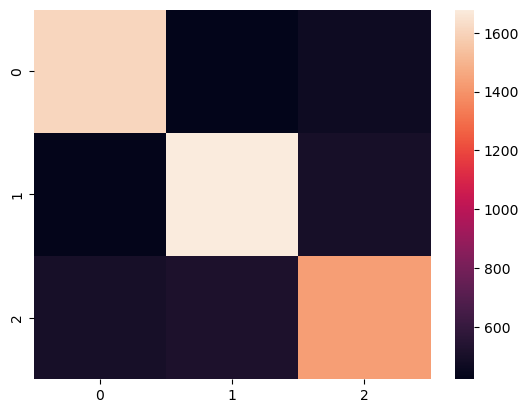

In [23]:
sns.heatmap(cm)

In [24]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
ran_mse=mean_squared_error(y_test,ran_y_te_pre)
print("mean_squared_error[randomforest]:",ran_mse)
ran_mae=mean_absolute_error(y_test,ran_y_te_pre)
print("mean_absolute_error[randomforest]:",ran_mae)
ran_r2=r2_score(y_test,ran_y_te_pre)
print("r2_score[randomforest]:",ran_r2)

mean_squared_error[randomforest]: 0.7585475748741055
mean_absolute_error[randomforest]: 0.5027829313543599
r2_score[randomforest]: -0.1585572299451823


In [25]:
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [26]:
kn.predict([[0,15,75,19,1,17,3]])

array([1])

In [27]:
kn_y_tr_pre=kn.predict(x_train)
kn_y_te_pre=kn.predict(x_test)
score_all=kn.score(x_test,y_test)
print(score_all)

0.5078187119003446


In [28]:
kn_tr_acc=accuracy_score(y_train,kn_y_tr_pre)
print(kn_tr_acc)
kn_te_acc=accuracy_score(y_test,kn_y_te_pre)
print(kn_te_acc)

0.6661806936160813
0.5078187119003446


In [29]:
print(classification_report(y_test,kn_y_te_pre))

              precision    recall  f1-score   support

           0       0.48      0.59      0.53      2497
           1       0.54      0.55      0.54      2605
           2       0.52      0.38      0.44      2444

    accuracy                           0.51      7546
   macro avg       0.51      0.51      0.50      7546
weighted avg       0.51      0.51      0.50      7546



In [31]:
pd.DataFrame(classification_report(y_test,kn_y_te_pre,output_dict=True))

,0,1,2,accuracy,macro avg,weighted avg
precision,0.478289,0.535607,0.516804,0.507819,0.510234,0.510551
recall,0.586704,0.548560,0.383797,0.507819,0.506354,0.507819
f1-score,0.526978,0.542006,0.440479,0.507819,0.503155,0.504151
support,2497.000000,2605.000000,2444.000000,0.507819,7546.000000,7546.000000


In [33]:
kn_cm=confusion_matrix(y_test,kn_y_te_pre)
print(kn_cm)

[[1465  569  463]
 [ 762 1429  414]
 [ 836  670  938]]


<Axes: >

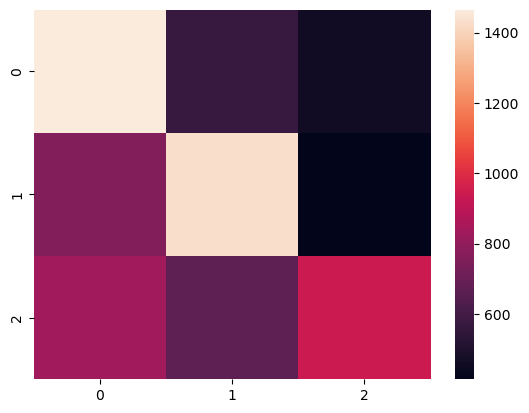

In [77]:
sns.heatmap(kn_cm)

In [78]:
kn_mse=mean_squared_error(y_test,kn_y_te_pre)
print("mean_squared_error(randomforest):",kn_mse)
kn_mae=mean_absolute_error(y_test,kn_y_te_pre)
print("mean_absolute_error(randomforest):",kn_mae)
kn_r2=r2_score(y_test,kn_y_te_pre)
print("r2_score(randomforest):",kn_r2)

mean_squared_error(randomforest): 1.0086138351444474
mean_absolute_error(randomforest): 0.6643254704479195
r2_score(randomforest): -0.5404925012426245
